In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

Part A - Classification

In [4]:
data1=pd.read_csv("diabetes.csv")

In [6]:
data1.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [8]:
data1.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [10]:
data1.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [12]:
imbalance=data1["Diabetes_012"].value_counts()
print(imbalance)

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


213,703 people are without diabets, while 35346 people are in prediabetic condition, only 4631 individuals have diabetic
As a result we can see that the dataset is highly imbalanced

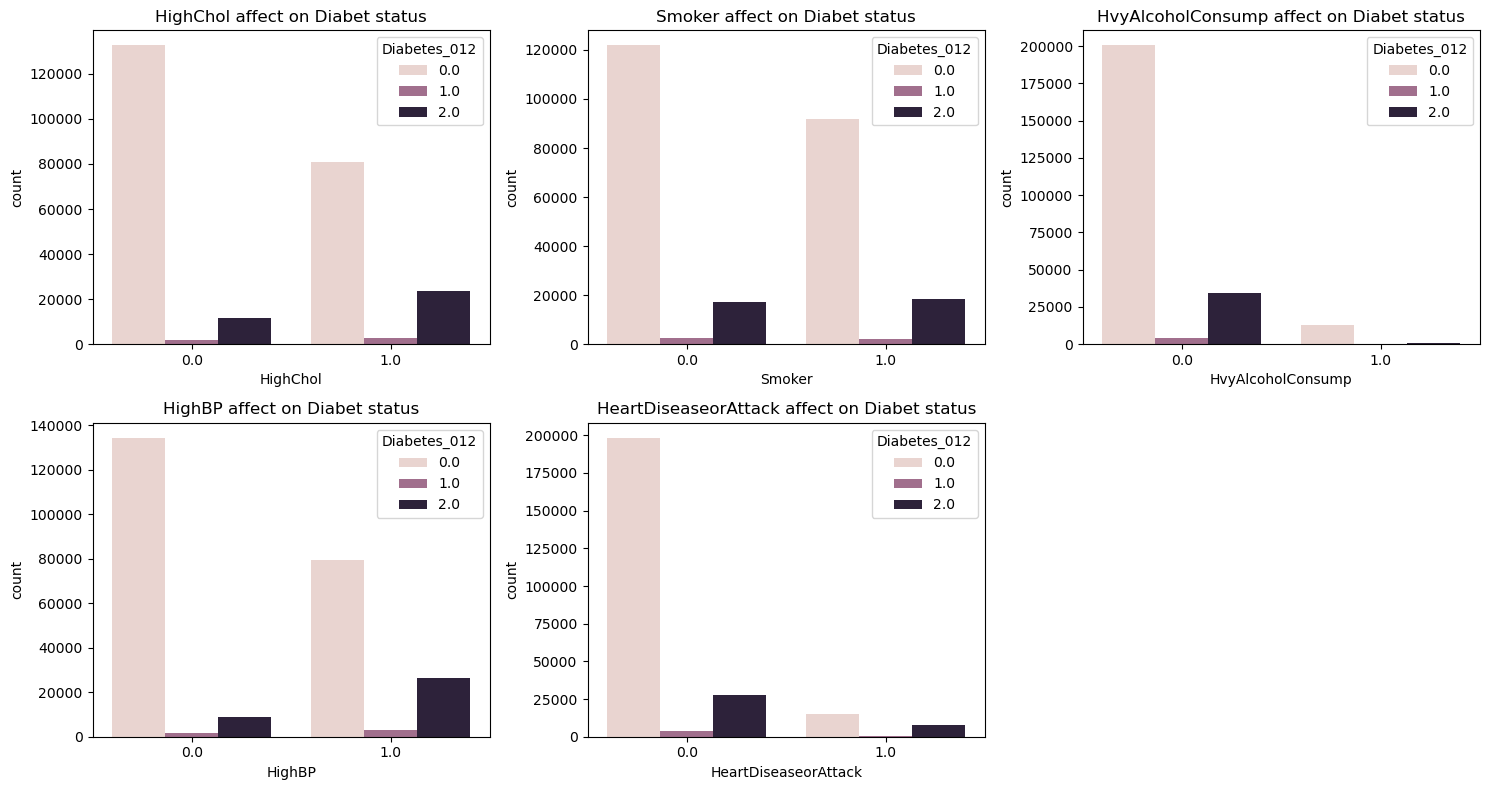

In [26]:
factors_col=["HighChol", "Smoker", "HvyAlcoholConsump", "HighBP", "HeartDiseaseorAttack"]
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten() 

for i, col in enumerate(factors_col):
    sns.countplot(data=data1, x=col, hue='Diabetes_012', ax=axes[i])
    axes[i].set_title(f'{col} affect on Diabet status')

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

1) People with High cholesterol(1.0) tend to be diabetic more often compared to people with no High cholesterol(0.0)
2) Individuals who smoke(1.0) and do not smoke(0.0) equally can be diabetic
3) Poeple who do not consume alcohol(0.0) still may be diabetic, while diabetics do not consume it 
4) Having High blood pressure(1.0) more likely to be diabetic
5) People with a history of heart disease or heart attack (HeartDiseaseorAttack = 1) are less likely to have diabetes (Diabetes_012 = 2)

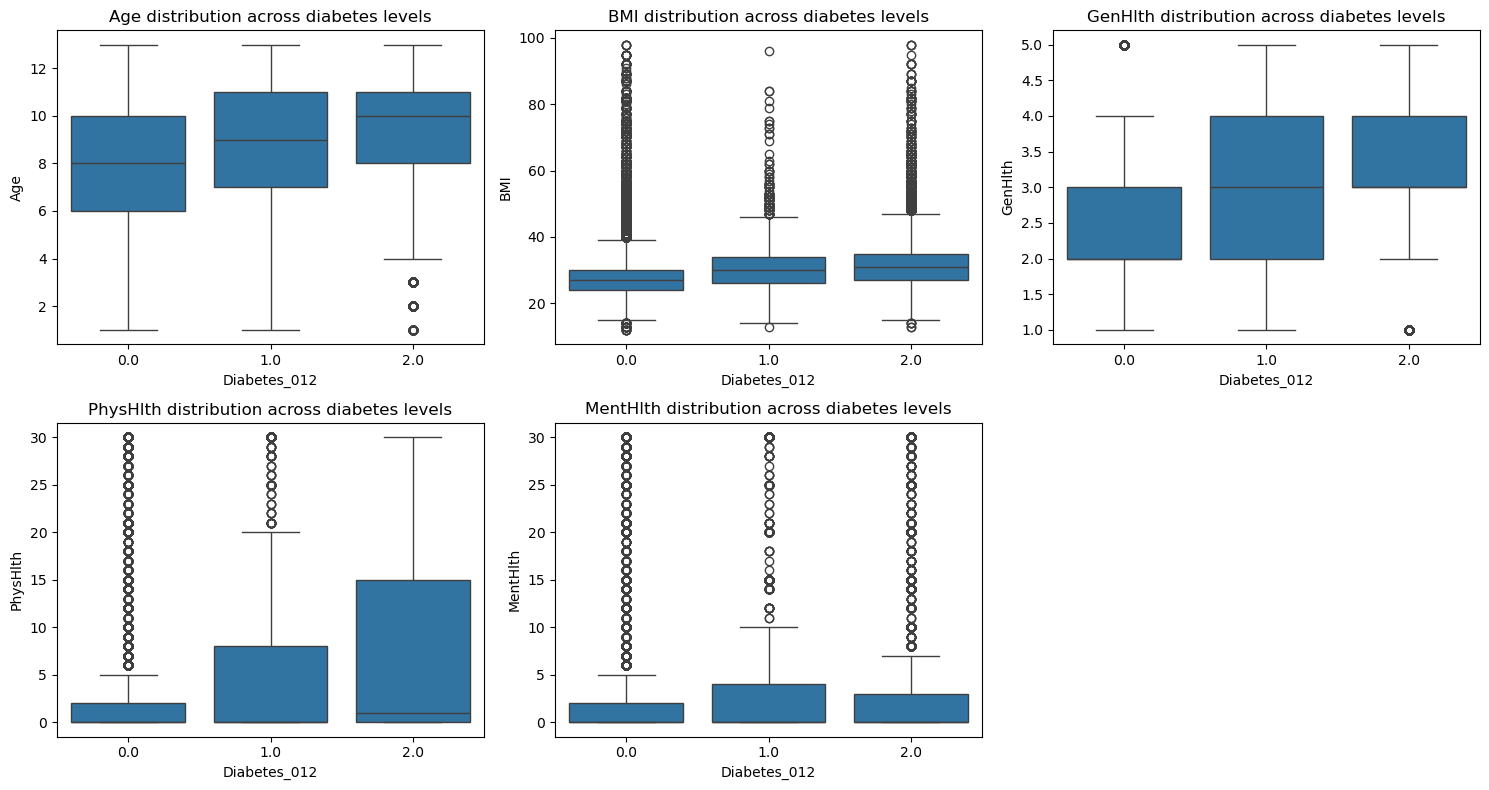

In [133]:
num_cols=["Age", "BMI", "GenHlth", "PhysHlth", "MentHlth"]
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten() 
for i, col in enumerate(num_cols):
    sns.boxplot(x='Diabetes_012', y=col, data=data1, ax=axes[i])
    axes[i].set_title(f'{col} distribution across diabetes levels')
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()
  
    

In [36]:
data1.corr()['Diabetes_012'].sort_values(ascending=False)


Diabetes_012            1.000000
GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Stroke                  0.107179
MentHlth                0.073507
CholCheck               0.067546
Smoker                  0.062914
NoDocbcCost             0.035436
Sex                     0.031040
AnyHealthcare           0.015410
Fruits                 -0.042192
HvyAlcoholConsump      -0.057882
Veggies                -0.058972
PhysActivity           -0.121947
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64

Positive correlations mean that these features increase together with diabetes risk
Negative correlations are features which decrease as diabetes increase

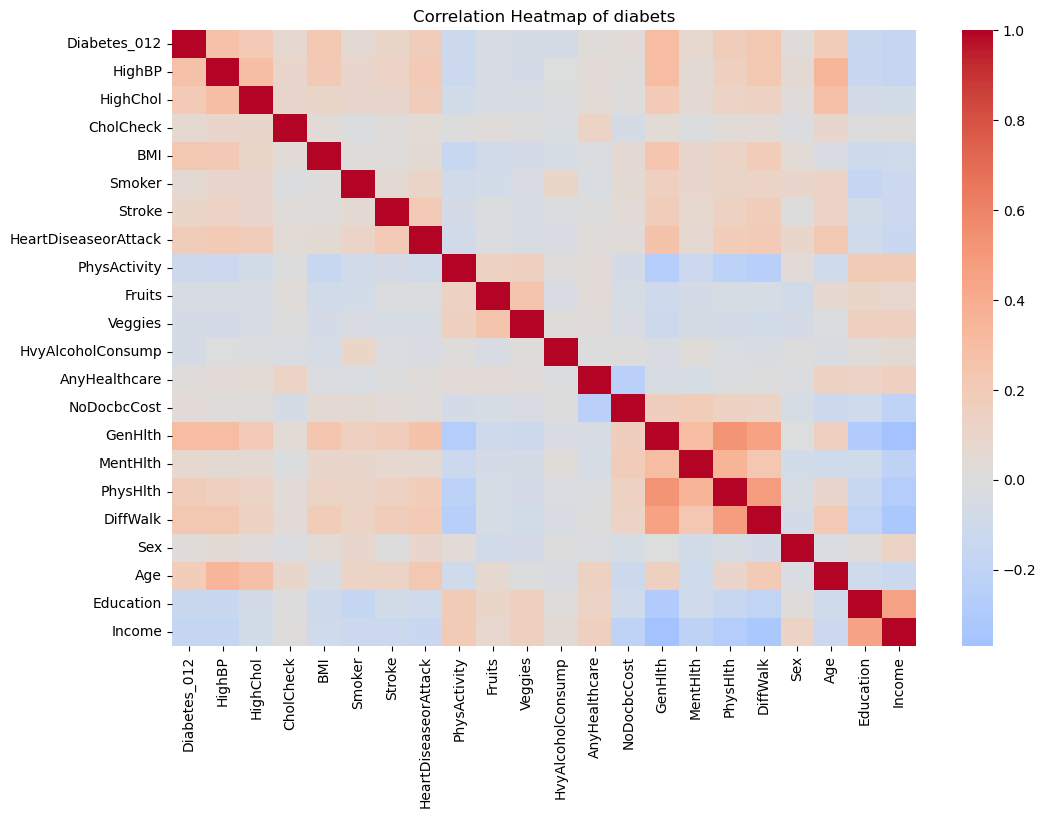

In [38]:
corr = data1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of diabets')
plt.show()

In [40]:
continuous_data=["PhysHlth", "MentHlth", "BMI", "GenHlth" ]
scaler=StandardScaler()
scaled_data=data1.copy()
scaled_data[continuous_data]=scaler.fit_transform(scaled_data[continuous_data])
scaled_data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,1.757936,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.329121,1.998592,1.233999,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,-0.511806,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.457294,-0.429630,-0.486592,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,-0.057858,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,2.329121,3.617407,2.954590,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,-0.209174,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,-0.478619,-0.429630,-0.486592,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,-0.663122,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,-0.478619,-0.024926,-0.486592,0.0,0.0,11.0,5.0,4.0


In [42]:
X=scaled_data.copy()
Y=X.pop("Diabetes_012")

In order to train machine learning model we need to seperate our features from target(Y) 

In [48]:
X_train,X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42, stratify=Y)
print("Class distribution before SMOTE:", Counter(Y_train))
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
print("Class distribution after SMOTE:", Counter(Y_train_resampled))

Class distribution before SMOTE: Counter({0.0: 170962, 2.0: 28277, 1.0: 3705})
Class distribution after SMOTE: Counter({0.0: 170962, 2.0: 170962, 1.0: 170962})


This code demonstrates how to address class imbalance in the diabetes dataset using SMOTE. Initially, the dataset contains 170,962 people without diabetes, making it highly imbalanced. The code first splits the data into training and testing sets and displays the class distribution in the training set before applying SMOTE. After using SMOTE, the resampled training data shows a more balanced data. 

In [50]:
reg=LogisticRegression(max_iter=1000, random_state=42)
reg.fit(X_train_resampled, Y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [52]:
rnd_forest=RandomForestClassifier(n_estimators=100, random_state=42)
rnd_forest.fit(X_train_resampled, Y_train_resampled)

RandomForestClassifier(random_state=42)

In [54]:
y_pred_log = reg.predict(X_test)                
y_proba_log = reg.predict_proba(X_test)  

In [75]:
roc_auc_multi = roc_auc_score(Y_test, y_proba_log, multi_class='ovr', average='macro')
print("ROC-AUC:", roc_auc_multi)

pr_auc_multi = average_precision_score(pd.get_dummies(Y_test), y_proba_log, average='macro')
print("PR-AUC:", pr_auc_multi)

print("F1-score:", f1_score(Y_test, y_pred_log, average='macro'))
print("Precision:", precision_score(Y_test, y_pred_log, average='macro'))
print("Recall:", recall_score(Y_test, y_pred_log, average='macro'))

cm_multi = confusion_matrix(Y_test, y_pred_log)
cm_df = pd.DataFrame(
    cm_multi,
    index=["Actual 0", "Actual 1", "Actual 2"],
    columns=["Pred 0", "Pred 1", "Pred 2"]
)
cm_df

ROC-AUC: 0.7676668341209769
PR-AUC: 0.461262224807284
F1-score: 0.423416528261737
Precision: 0.44378679690770256
Recall: 0.5148337300219352


,Pred 0,Pred 1,Pred 2
Actual 0,28276,7449,7016
Actual 1,258,291,377
Actual 2,1276,1773,4020


In [60]:
y_pred_rf = rnd_forest.predict(X_test)         
y_proba_rf = rnd_forest.predict_proba(X_test) 

In [79]:
roc_auc_multi = roc_auc_score(Y_test, y_proba_rf, multi_class='ovr', average='macro')
print("ROC-AUC:", roc_auc_multi)

pr_auc_multi = average_precision_score(pd.get_dummies(Y_test), y_proba_rf, average='macro')
print("PR-AUC:", pr_auc_multi)

print("F1-score:", f1_score(Y_test, y_pred_rf, average='macro'))
print("Precision:", precision_score(Y_test, y_pred_rf, average='macro'))
print("Recall:", recall_score(Y_test, y_pred_rf, average='macro'))

cm_multi = confusion_matrix(Y_test, y_pred_rf)
cm_df = pd.DataFrame(
    cm_multi,
    index=["Actual 0", "Actual 1", "Actual 2"],
    columns=["Pred 0", "Pred 1", "Pred 2"]
)
cm_df

ROC-AUC: 0.737819890140378
PR-AUC: 0.4441410688343554
F1-score: 0.4199086326188159
Precision: 0.44378231795818657
Recall: 0.4112587959026612


,Pred 0,Pred 1,Pred 2
Actual 0,40155,76,2510
Actual 1,762,2,162
Actual 2,4985,19,2065


OVR = One-vs-Rest
Scikit-learn will treat each class as:
class = positive
all other classes = negative

average='macro': It treats all classes equally, regardless of how many samples belong to them.In my case there are 3 classes(0,1,2), therefore i used it


Logistic Regression performed better than Random Forest in detecting diabetes cases. It achieved higher ROC-AUC (0.768 vs 0.738) and recall (0.515 vs 0.411), indicating it identifies more actual diabetic patients. Random Forest predicted the majority class (no diabetes) very well but struggled with the minority classes, especially pre-diabetes and diabetes, missing many positive cases. Overall, Logistic Regression provides a more balanced performance across all classes, while Random Forest is biased toward the majority class.

Part B - Clustering 

In [65]:
data2=pd.read_csv("customers.csv")

In [67]:
data2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [69]:
data2.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [71]:
data2.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

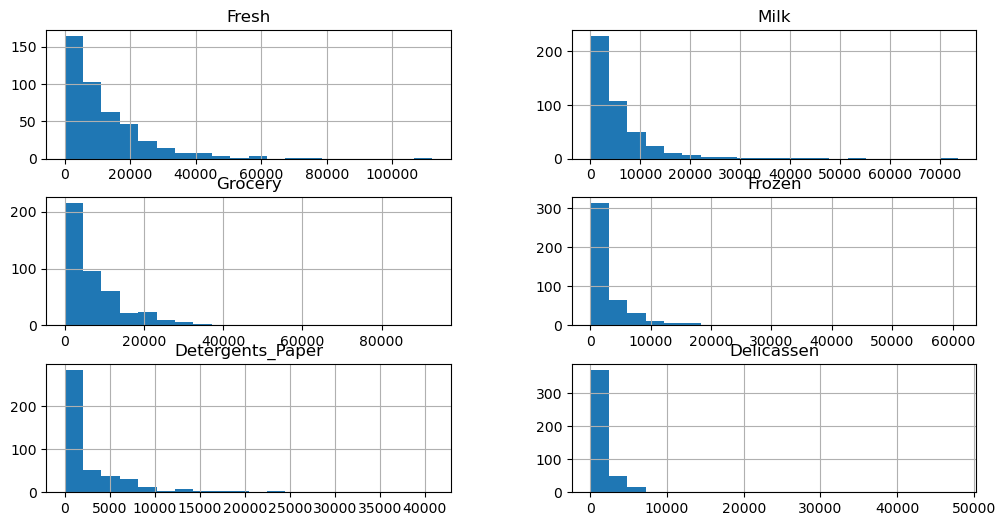

In [73]:
numeric_data=["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen" ]
data2[numeric_data].hist(bins=20, figsize=(12,6))
plt.show()


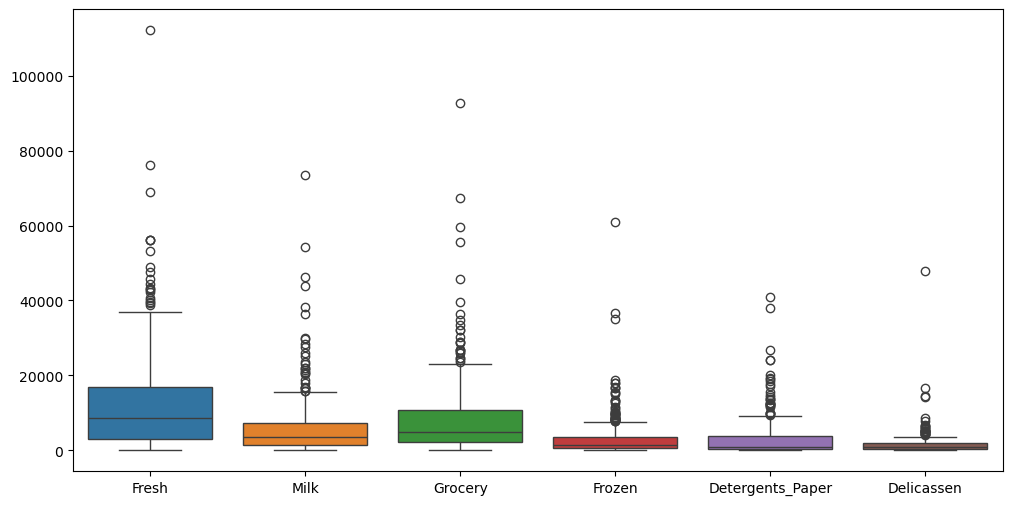

In [81]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data2[numeric_data])
plt.show()

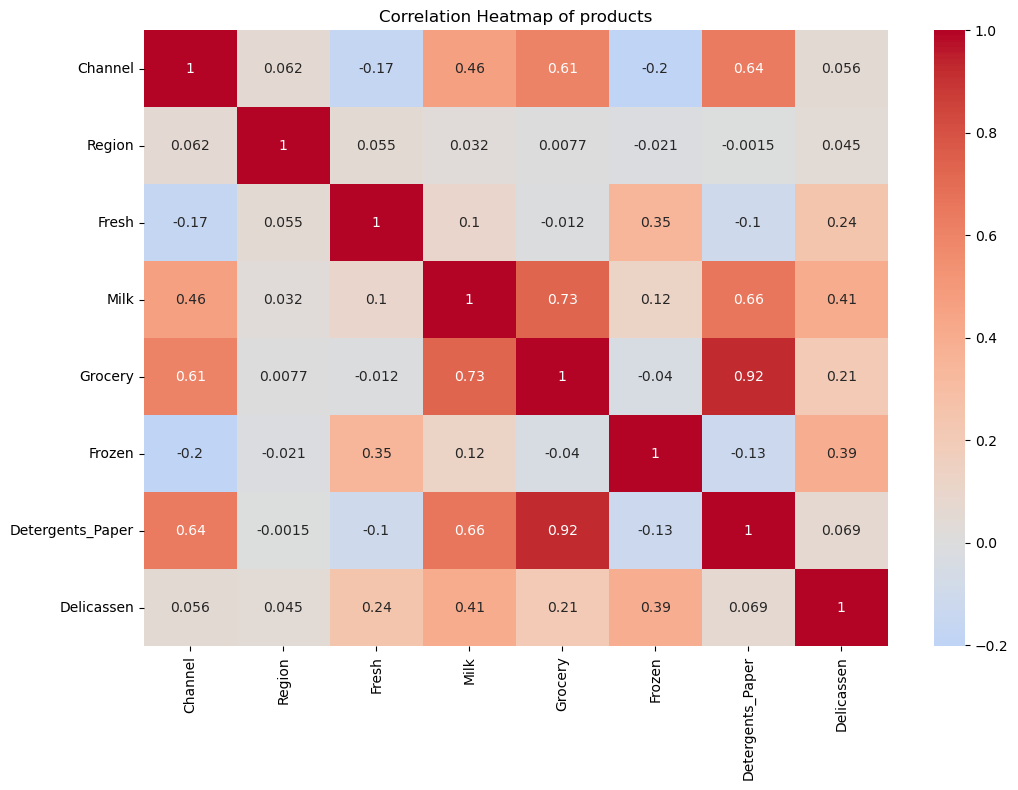

In [83]:
corr = data2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True)
plt.title('Correlation Heatmap of products')
plt.show()

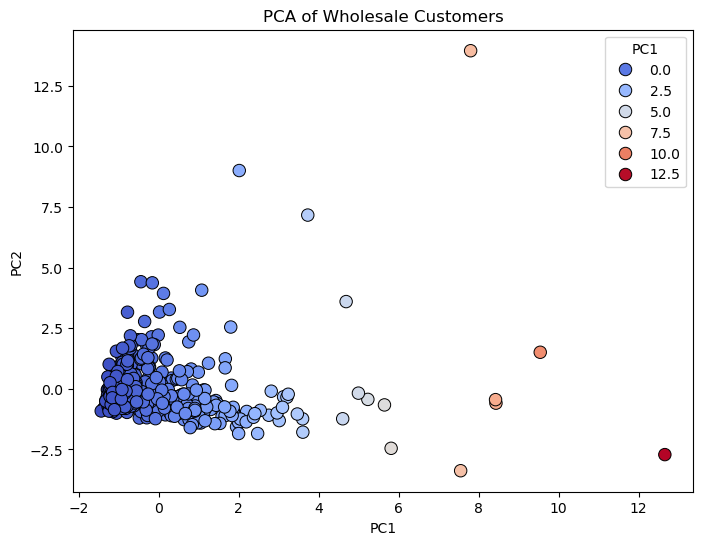

In [85]:
scaler2=StandardScaler()
scaled_data = scaler2.fit_transform(data2[numeric_data])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
plt.figure(figsize=(8,6))
pca_df = pd.DataFrame(pca_result, columns=['PC1','PC2'])
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='PC1',palette='coolwarm', edgecolor='k', s=80)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Wholesale Customers')
plt.show()

In [87]:
data2['Channel'] = data2['Channel'].astype(str)
data2['Region'] = data2['Region'].astype(str)
categorical_data=["Channel", "Region"]
#one-hot encoding
data_encoding = pd.get_dummies(data2[categorical_data], dtype=int)
data_encoding.head()

,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0,1,0,0,1
1,0,1,0,0,1
2,0,1,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [89]:
scaled_data_full = np.hstack((scaled_data, data_encoding.values))
print("Mean of full data (numeric + categorical):", np.mean(scaled_data_full, axis=0))
print("Std of full data (numeric + categorical):", np.std(scaled_data_full, axis=0))

Mean of full data (numeric + categorical): [-3.43159844e-17  0.00000000e+00 -4.03717464e-17  3.63345717e-17
  2.42230478e-17 -8.07434927e-18  6.77272727e-01  3.22727273e-01
  1.75000000e-01  1.06818182e-01  7.18181818e-01]
Std of full data (numeric + categorical): [1.         1.         1.         1.         1.         1.
 0.46751939 0.46751939 0.3799671  0.30888195 0.4498852 ]


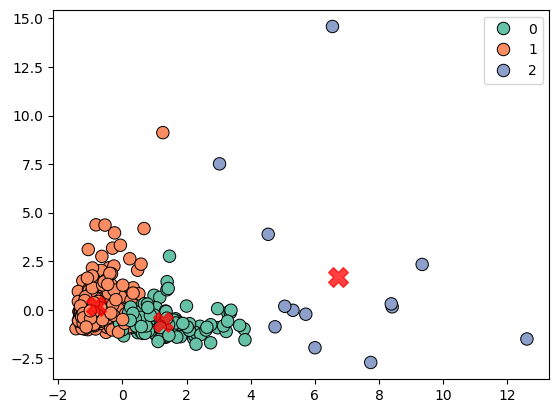

In [107]:
X = scaled_data_full
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(centroids)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette='Set2', s=80, edgecolor='k')
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], c='red', s=200, marker='X', alpha=0.75)



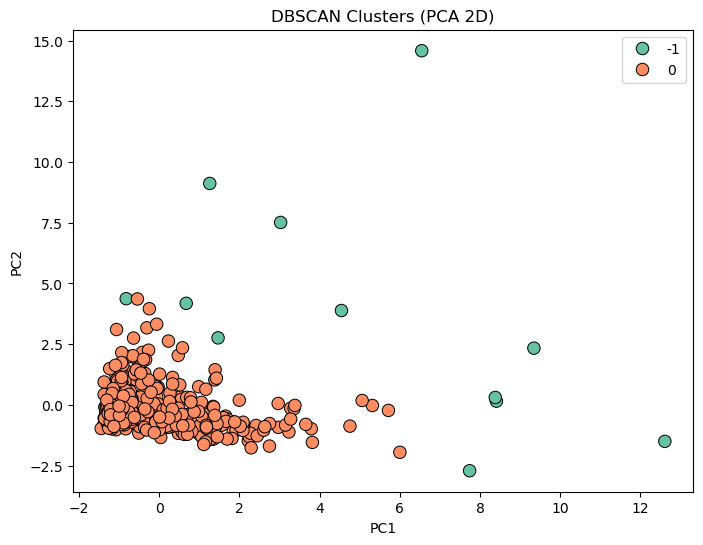

Number of clusters: 1
Number of noise points: 12


In [109]:
X = scaled_data_full
dbscan = DBSCAN(eps=3, min_samples=5)
clusters = dbscan.fit_predict(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='Set2', s=80, edgecolor='k')
plt.title("DBSCAN Clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#number of clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

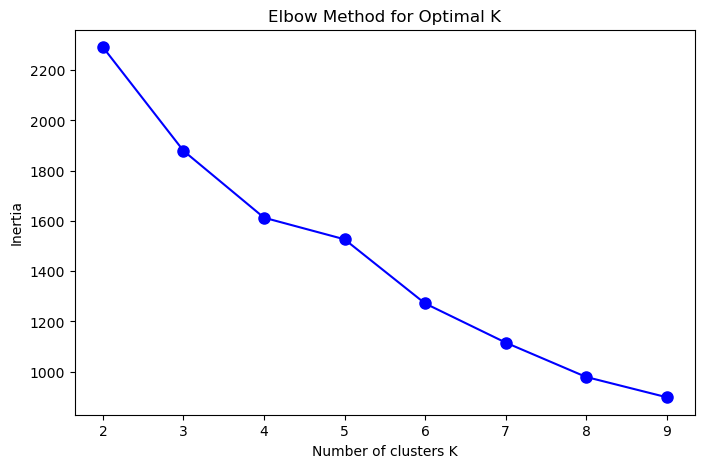

In [111]:
X = scaled_data_full
k_values = range(2, 10)

inertia_list = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertia_list, 'bo-', markersize=8)
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

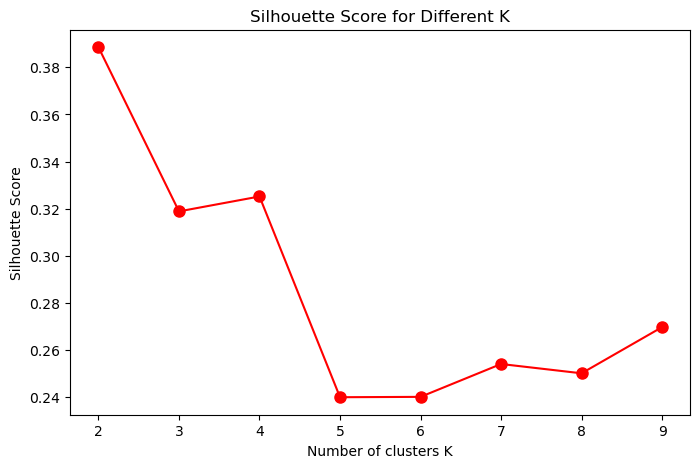

In [113]:
X = scaled_data_full
k_values = range(2, 10) 
silhouette_list = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_list.append(score)
plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_list, 'ro-', markersize=8)
plt.xlabel('Number of clusters K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.show()

Elbow Method suggests K=5 because decreases sharply up to K=4. However, Silhouette Score is highest at K=2, indicating that two clusters have the best separation. I can choose K=2 for clean separation

In [248]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(scaled_data_full)

sil_score = silhouette_score(scaled_data_full, labels)
print(f'Silhouette Score for K={k}: {sil_score:.3f}')

Silhouette Score for K=9: 0.394


In [128]:
stability_runs = 6
all_labels = []

for i in range(stability_runs):
    labels_run = KMeans(n_clusters=2, random_state=i, n_init=10).fit_predict(scaled_data_full)
    all_labels.append(labels_run)

all_labels = np.array(all_labels)

ari_scores = []
nmi_scores = []

for i in range(stability_runs):
    for j in range(i + 1, stability_runs):
        ari = adjusted_rand_score(all_labels[i], all_labels[j])
        nmi = normalized_mutual_info_score(all_labels[i], all_labels[j])
        ari_scores.append(ari)
        nmi_scores.append(nmi)

print(f"Average Adjusted Rand Index (ARI): {np.mean(ari_scores):.3f}")
print(f"Average Normalized Mutual Info (NMI): {np.mean(nmi_scores):.3f}")

Average Adjusted Rand Index (ARI): 0.976
Average Normalized Mutual Info (NMI): 0.951


These values indicate that chosen number of clusters and the K-Means model are highly consistent and reliable
ARI-Measures exact agreement of cluster assignments (1 = perfect stability, 0 = random)
NMI-Measures how much information is shared between clusterings (1 = identical)


In [250]:
df_cluster = data2.copy() 
df_cluster['Cluster'] = labels 
df_cluster.head(10) 

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1
5,2,3,9413,8259,5126,666,1795,1451,1
6,2,3,12126,3199,6975,480,3140,545,1
7,2,3,7579,4956,9426,1669,3321,2566,1
8,1,3,5963,3648,6192,425,1716,750,1
9,2,3,6006,11093,18881,1159,7425,2098,0


In [252]:
df_cluster['Cluster'].value_counts()

Cluster
1    342
0     98
Name: count, dtype: int64

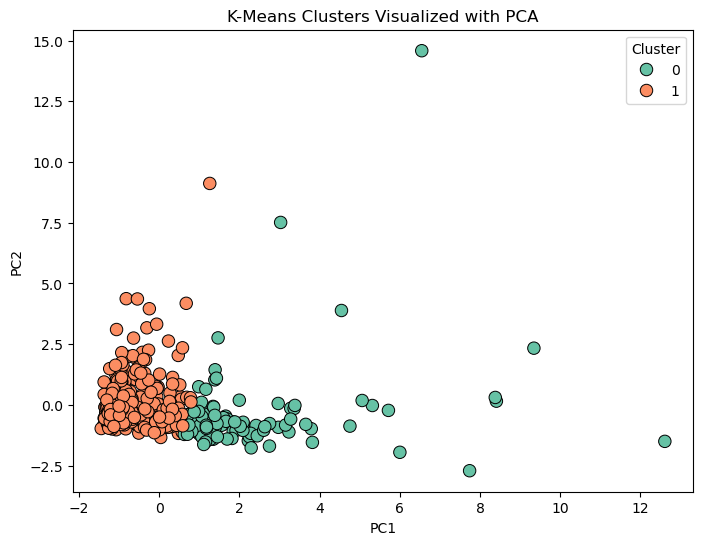

In [254]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data_full)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_cluster['Cluster'], palette='Set2', s=80, edgecolor='k')
plt.title("K-Means Clusters Visualized with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

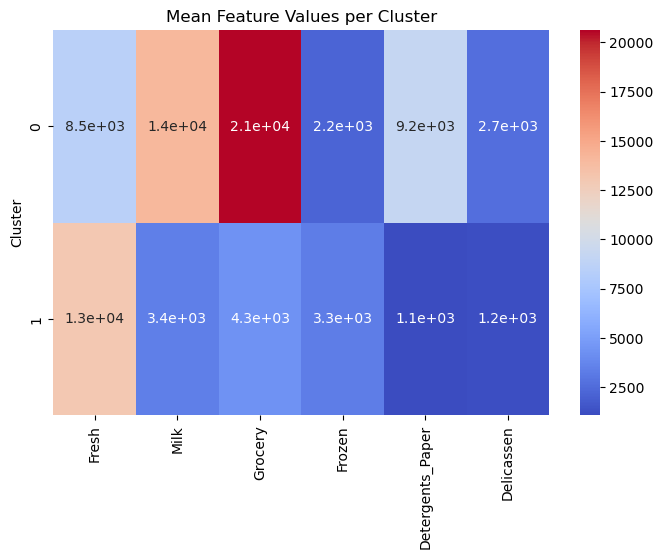

In [262]:
numeric_data = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

cluster_means = df_cluster.groupby('Cluster')[numeric_data].mean()

plt.figure(figsize=(8,5))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm')
plt.title("Mean Feature Values per Cluster")
plt.show()

We use the mean to summarize the typical feature values for each cluster, so we can easily compare clusters and understand their characteristics,

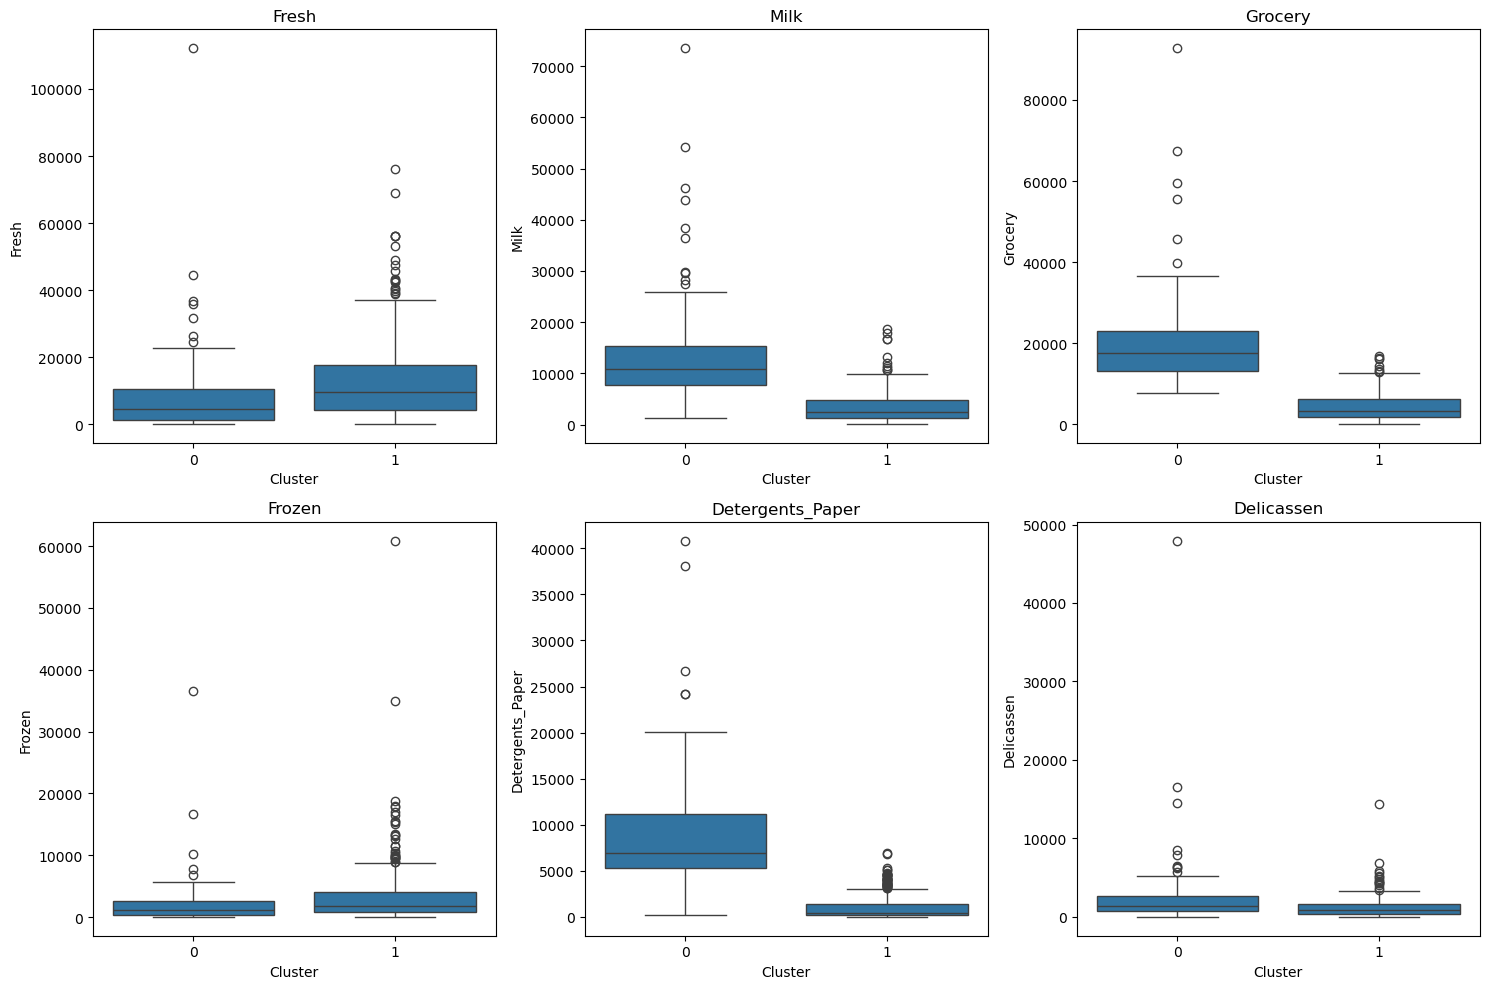

In [268]:
numeric_data = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

plt.figure(figsize=(15,10)) 

for i, col in enumerate(numeric_data):
    plt.subplot(2, 3, i+1) 
    sns.boxplot(x='Cluster', y=col, data=df_cluster)
    plt.title(col)

plt.tight_layout()
plt.show()

High-Spending, Grocery-Dominant Customers
In heatmap cluster 0 has much higher averages in:fresh, Detergents Paper and Delicassen
In boxplots cluster 0 has higher value in milk, Detergents Paper and grocery
In PCA cluster is spread widely along PC1, which indicates large variability in total spend, represents high-volume and diverse buyers and a few extreme PC2 outliers. 
May be suitable for retail businesses

Cluster 1 has significantly lower averages, these customers buy mostly Fresh and Frozen categories. In PCA Cluster 1 is more compact, suggesting consistent, predictable purchasing, probably will fit for a small business